# Telecom Churn - Case Study

In [1]:
# import required packages and libraries

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
# import the dataset

churn = pd.read_csv("telecom_churn_data.csv")
churn.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [3]:
# Verify dimensions
churn.shape

(99999, 226)

## Filtering Values on Basis of Customer

In [4]:
# Create new column with recharge data amount and total recharge data

churn['total_rech_data_amt_6'] = churn['av_rech_amt_data_6'] * churn['total_rech_data_6']
churn['total_rech_data_amt_7'] = churn['av_rech_amt_data_7'] * churn['total_rech_data_7']
churn['total_rech_data_amt_8'] = churn['av_rech_amt_data_8'] * churn['total_rech_data_8']
churn['total_rech_data_amt_9'] = churn['av_rech_amt_data_9'] * churn['total_rech_data_9']

In [5]:
# Drop the unwanted columns

churn.drop(['total_rech_data_6','total_rech_data_7','total_rech_data_8','total_rech_data_9',
'av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8','av_rech_amt_data_9'],axis = 1,inplace = True)

In [6]:
# Find average of recharge with 70 percentage of amount

churn_avg_of_6and7 = (churn['total_rech_amt_6'].fillna(0) 
+ churn['total_rech_amt_7'].fillna(0) 
+ churn['total_rech_data_amt_6'].fillna(0) 
+ churn['total_rech_data_amt_7'].fillna(0))/2

percentile_70_6and7 = np.percentile(churn_avg_of_6and7, 70.0)
print(percentile_70_6and7)

478.0


In [7]:
# fitler on basis of 70th percentile

churn_hv_cust = churn[churn_avg_of_6and7 >= percentile_70_6and7]
churn_hv_cust.shape

(30001, 222)

In [8]:
# Create new column
churn_hv_cust['new_churn'] = np.where(churn_hv_cust[['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']].sum(axis=1) == 0, 1,0)
churn_hv_cust.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_data_amt_6,total_rech_data_amt_7,total_rech_data_amt_8,total_rech_data_amt_9,new_churn
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,968,30.40,0.00,101.20,3.58,252.0,252.0,252.0,NaN,1
7,7000701601,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,1069.180,...,802,57.74,19.38,18.74,0.00,NaN,NaN,NaN,NaN,1
8,7001524846,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,378.721,...,315,21.03,910.65,122.16,0.00,NaN,354.0,207.0,NaN,0
21,7002124215,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,514.453,...,720,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN,0
23,7000887461,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,74.350,...,604,40.45,51.86,0.00,0.00,NaN,712.0,540.0,252.0,0


In [9]:
# Find the number of churn values

churn_hv_cust['new_churn'].value_counts()/len(churn_hv_cust)*100

0    91.863605
1     8.136395
Name: new_churn, dtype: float64

In [10]:
# Drop the non variance values 

for i in churn_hv_cust.columns:
    if churn_hv_cust[i].nunique() == 1:
        churn_hv_cust.drop(i,axis=1,inplace = True)

churn_hv_cust.shape

(30001, 207)

In [11]:
# Verify the null values

(churn_hv_cust.isnull().sum() * 100 / len(churn_hv_cust)).sort_values(ascending = False)

total_rech_data_amt_9    49.268358
count_rech_3g_9          49.268358
arpu_3g_9                49.268358
arpu_2g_9                49.268358
night_pck_user_9         49.268358
                           ...    
last_day_rch_amt_7        0.000000
last_day_rch_amt_8        0.000000
last_day_rch_amt_9        0.000000
vol_2g_mb_6               0.000000
mobile_number             0.000000
Length: 207, dtype: float64

In [12]:
# Drop Columns with more than 30% of missing values

cols = churn_hv_cust.columns
churn_null_perc = churn_hv_cust.isnull().sum() * 100 / len(churn_hv_cust)
churn_null_df = pd.DataFrame({'col_name': cols,
                                 'perc_null': churn_null_perc})

drop_cols = churn_null_df.loc[(churn_null_df["col_name"].str.contains('_9')==False) & (churn_null_df["perc_null"] > 30.0)]["col_name"]

# Drop these columns
churn_hv_cust.drop(drop_cols, axis=1,inplace = True)
churn_hv_cust.shape

(30001, 180)

In [13]:
# Verify integers, floats or Date types

object_col_data = churn_hv_cust.select_dtypes(include=['object'])
print(object_col_data.iloc[0])

date_of_last_rech_6         6/21/2014
date_of_last_rech_7         7/16/2014
date_of_last_rech_8          8/8/2014
date_of_last_rech_9         9/28/2014
date_of_last_rech_data_9          NaN
Name: 0, dtype: object


In [14]:
# convert to datetime

for col in object_col_data.columns:
    churn_hv_cust[col] = pd.to_datetime(churn_hv_cust[col])

churn_hv_cust.shape

(30001, 180)

In [15]:
# Verify the correlation

cor = churn_hv_cust.corr()
cor.loc[:,:] = np.tril(cor, k=-1)
cor = cor.stack()
cor[(cor > 0.60) | (cor < -0.60)].sort_values()

monthly_3g_6      vol_3g_mb_6         0.601308
total_ic_mou_7    loc_ic_t2t_mou_7    0.601684
arpu_2g_9         count_rech_3g_9     0.602386
total_og_mou_8    onnet_mou_9         0.603450
total_rech_amt_8  arpu_6              0.603673
                                        ...   
isd_og_mou_8      isd_og_mou_7        0.949809
                  isd_og_mou_6        0.950194
total_rech_amt_9  arpu_9              0.950539
total_rech_amt_8  arpu_8              0.955351
sachet_2g_9       count_rech_2g_9     0.980131
Length: 337, dtype: float64

In [16]:
# we will drop the columns with high correlation

drop_column_list = ['loc_og_t2m_mou_6','std_og_t2t_mou_6','std_og_t2t_mou_7','std_og_t2t_mou_8','std_og_t2t_mou_9','std_og_t2m_mou_6',
                'std_og_t2m_mou_7','std_og_t2m_mou_8','std_og_t2m_mou_9','total_og_mou_6','total_og_mou_7','total_og_mou_8',
                'loc_ic_t2t_mou_6','loc_ic_t2t_mou_7','loc_ic_t2t_mou_8','loc_ic_t2t_mou_9','loc_ic_t2m_mou_6','loc_ic_t2m_mou_7','loc_ic_t2m_mou_8','loc_ic_t2m_mou_9',
                'std_ic_t2m_mou_6','std_ic_t2m_mou_7','std_ic_t2m_mou_8','std_ic_t2m_mou_9','total_ic_mou_6','total_ic_mou_7','total_ic_mou_8',
                'total_rech_amt_6','total_rech_amt_7','total_rech_amt_8','total_rech_amt_9','arpu_2g_9','count_rech_2g_9','count_rech_3g_9','vol_3g_mb_6','vol_3g_mb_7','vol_3g_mb_8',
                'loc_og_t2t_mou_6','loc_og_t2t_mou_7','loc_og_t2t_mou_8','loc_og_t2t_mou_9','loc_og_t2f_mou_6','loc_og_t2f_mou_7','loc_og_t2f_mou_8','loc_og_t2f_mou_9',
                'loc_og_t2m_mou_6','loc_og_t2m_mou_7','loc_og_t2m_mou_8','loc_og_t2m_mou_9','loc_ic_t2f_mou_6','loc_ic_t2f_mou_7','loc_ic_t2f_mou_8','loc_ic_t2f_mou_9',
                'date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8']
                 
churn_hv_cust.drop(drop_column_list, axis=1, inplace=True)
churn_hv_cust.shape

(30001, 125)

In [17]:
# Delete 9th month columns to predict churn/non-churn

columns_to_drop = [col for col in churn_hv_cust.columns if '_9' in col]

churn_hv_cust.drop(columns_to_drop, axis=1, inplace=True)
churn_hv_cust.shape

(30001, 88)

In [18]:
# Verify dataset again

(churn_hv_cust.isnull().sum() * 100 / len(churn_hv_cust)).sort_values(ascending = False)

std_og_mou_8        3.913203
std_ic_t2f_mou_8    3.913203
ic_others_8         3.913203
loc_og_mou_8        3.913203
isd_ic_mou_8        3.913203
                      ...   
max_rech_amt_7      0.000000
max_rech_amt_6      0.000000
total_rech_num_8    0.000000
total_rech_num_7    0.000000
mobile_number       0.000000
Length: 88, dtype: float64

In [19]:
# Drop rows with null values

churn_hv_cust = churn_hv_cust[~np.isnan(churn_hv_cust['onnet_mou_6'])]
churn_hv_cust = churn_hv_cust[~np.isnan(churn_hv_cust['onnet_mou_7'])]
churn_hv_cust = churn_hv_cust[~np.isnan(churn_hv_cust['onnet_mou_8'])]
churn_hv_cust = churn_hv_cust[~np.isnan(churn_hv_cust['offnet_mou_6'])]
churn_hv_cust = churn_hv_cust[~np.isnan(churn_hv_cust['offnet_mou_7'])]
churn_hv_cust = churn_hv_cust[~np.isnan(churn_hv_cust['offnet_mou_8'])]
churn_hv_cust = churn_hv_cust[~np.isnan(churn_hv_cust['roam_ic_mou_6'])]
churn_hv_cust = churn_hv_cust[~np.isnan(churn_hv_cust['roam_ic_mou_7'])]
churn_hv_cust = churn_hv_cust[~np.isnan(churn_hv_cust['roam_ic_mou_8'])]
churn_hv_cust = churn_hv_cust[~np.isnan(churn_hv_cust['roam_og_mou_6'])]
churn_hv_cust = churn_hv_cust[~np.isnan(churn_hv_cust['roam_og_mou_7'])]
churn_hv_cust = churn_hv_cust[~np.isnan(churn_hv_cust['roam_og_mou_8'])]
churn_hv_cust = churn_hv_cust[~np.isnan(churn_hv_cust['loc_og_t2c_mou_6'])]
churn_hv_cust = churn_hv_cust[~np.isnan(churn_hv_cust['loc_og_t2c_mou_7'])]
churn_hv_cust = churn_hv_cust[~np.isnan(churn_hv_cust['loc_og_t2c_mou_8'])]
churn_hv_cust = churn_hv_cust[~np.isnan(churn_hv_cust['loc_og_mou_6'])]
churn_hv_cust = churn_hv_cust[~np.isnan(churn_hv_cust['loc_og_mou_7'])]
churn_hv_cust = churn_hv_cust[~np.isnan(churn_hv_cust['loc_og_mou_8'])]
churn_hv_cust = churn_hv_cust[~np.isnan(churn_hv_cust['std_og_t2f_mou_6'])]
churn_hv_cust = churn_hv_cust[~np.isnan(churn_hv_cust['std_og_t2f_mou_7'])]
churn_hv_cust = churn_hv_cust[~np.isnan(churn_hv_cust['std_og_t2f_mou_8'])]
churn_hv_cust = churn_hv_cust[~np.isnan(churn_hv_cust['std_og_mou_6'])]
churn_hv_cust = churn_hv_cust[~np.isnan(churn_hv_cust['std_og_mou_7'])]
churn_hv_cust = churn_hv_cust[~np.isnan(churn_hv_cust['std_og_mou_8'])]
churn_hv_cust = churn_hv_cust[~np.isnan(churn_hv_cust['isd_og_mou_6'])]
churn_hv_cust = churn_hv_cust[~np.isnan(churn_hv_cust['isd_og_mou_7'])]
churn_hv_cust = churn_hv_cust[~np.isnan(churn_hv_cust['isd_og_mou_8'])]
churn_hv_cust = churn_hv_cust[~np.isnan(churn_hv_cust['spl_og_mou_6'])]
churn_hv_cust = churn_hv_cust[~np.isnan(churn_hv_cust['spl_og_mou_7'])]
churn_hv_cust = churn_hv_cust[~np.isnan(churn_hv_cust['spl_og_mou_8'])]
churn_hv_cust = churn_hv_cust[~np.isnan(churn_hv_cust['og_others_6'])]
churn_hv_cust = churn_hv_cust[~np.isnan(churn_hv_cust['og_others_7'])]
churn_hv_cust = churn_hv_cust[~np.isnan(churn_hv_cust['og_others_8'])]
churn_hv_cust = churn_hv_cust[~np.isnan(churn_hv_cust['loc_ic_mou_6'])]
churn_hv_cust = churn_hv_cust[~np.isnan(churn_hv_cust['loc_ic_mou_7'])]
churn_hv_cust = churn_hv_cust[~np.isnan(churn_hv_cust['loc_ic_mou_8'])]
churn_hv_cust = churn_hv_cust[~np.isnan(churn_hv_cust['std_ic_t2t_mou_6'])]
churn_hv_cust = churn_hv_cust[~np.isnan(churn_hv_cust['std_ic_t2t_mou_7'])]
churn_hv_cust = churn_hv_cust[~np.isnan(churn_hv_cust['std_ic_t2t_mou_8'])]
churn_hv_cust = churn_hv_cust[~np.isnan(churn_hv_cust['std_ic_t2f_mou_6'])]
churn_hv_cust = churn_hv_cust[~np.isnan(churn_hv_cust['std_ic_t2f_mou_7'])]
churn_hv_cust = churn_hv_cust[~np.isnan(churn_hv_cust['std_ic_t2f_mou_8'])]
churn_hv_cust = churn_hv_cust[~np.isnan(churn_hv_cust['std_ic_mou_6'])]
churn_hv_cust = churn_hv_cust[~np.isnan(churn_hv_cust['std_ic_mou_7'])]
churn_hv_cust = churn_hv_cust[~np.isnan(churn_hv_cust['std_ic_mou_8'])]
churn_hv_cust = churn_hv_cust[~np.isnan(churn_hv_cust['spl_ic_mou_6'])]
churn_hv_cust = churn_hv_cust[~np.isnan(churn_hv_cust['spl_ic_mou_7'])]
churn_hv_cust = churn_hv_cust[~np.isnan(churn_hv_cust['spl_ic_mou_8'])]
churn_hv_cust = churn_hv_cust[~np.isnan(churn_hv_cust['isd_ic_mou_6'])]
churn_hv_cust = churn_hv_cust[~np.isnan(churn_hv_cust['isd_ic_mou_7'])]
churn_hv_cust = churn_hv_cust[~np.isnan(churn_hv_cust['isd_ic_mou_8'])]
churn_hv_cust = churn_hv_cust[~np.isnan(churn_hv_cust['ic_others_6'])]
churn_hv_cust = churn_hv_cust[~np.isnan(churn_hv_cust['ic_others_7'])]
churn_hv_cust = churn_hv_cust[~np.isnan(churn_hv_cust['ic_others_8'])]

In [20]:
# Verify the dataset again

(churn_hv_cust.isnull().sum() * 100 / len(churn_hv_cust)).sort_values(ascending = False)

new_churn           0.0
sep_vbc_3g          0.0
std_og_t2f_mou_7    0.0
std_og_t2f_mou_8    0.0
std_og_mou_6        0.0
                   ... 
total_rech_num_8    0.0
max_rech_amt_6      0.0
max_rech_amt_7      0.0
max_rech_amt_8      0.0
mobile_number       0.0
Length: 88, dtype: float64

## Plotting using histogram, correlation matrix, scatter plot

In [21]:
# function to plot historgram for sample columns

def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]]
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

In [22]:
# function to plot correlation matrix

def plotCorrelationMatrix(df, graphWidth):
    filename = "Telecom Churn"
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

In [23]:
# function to plot scatter plots

def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

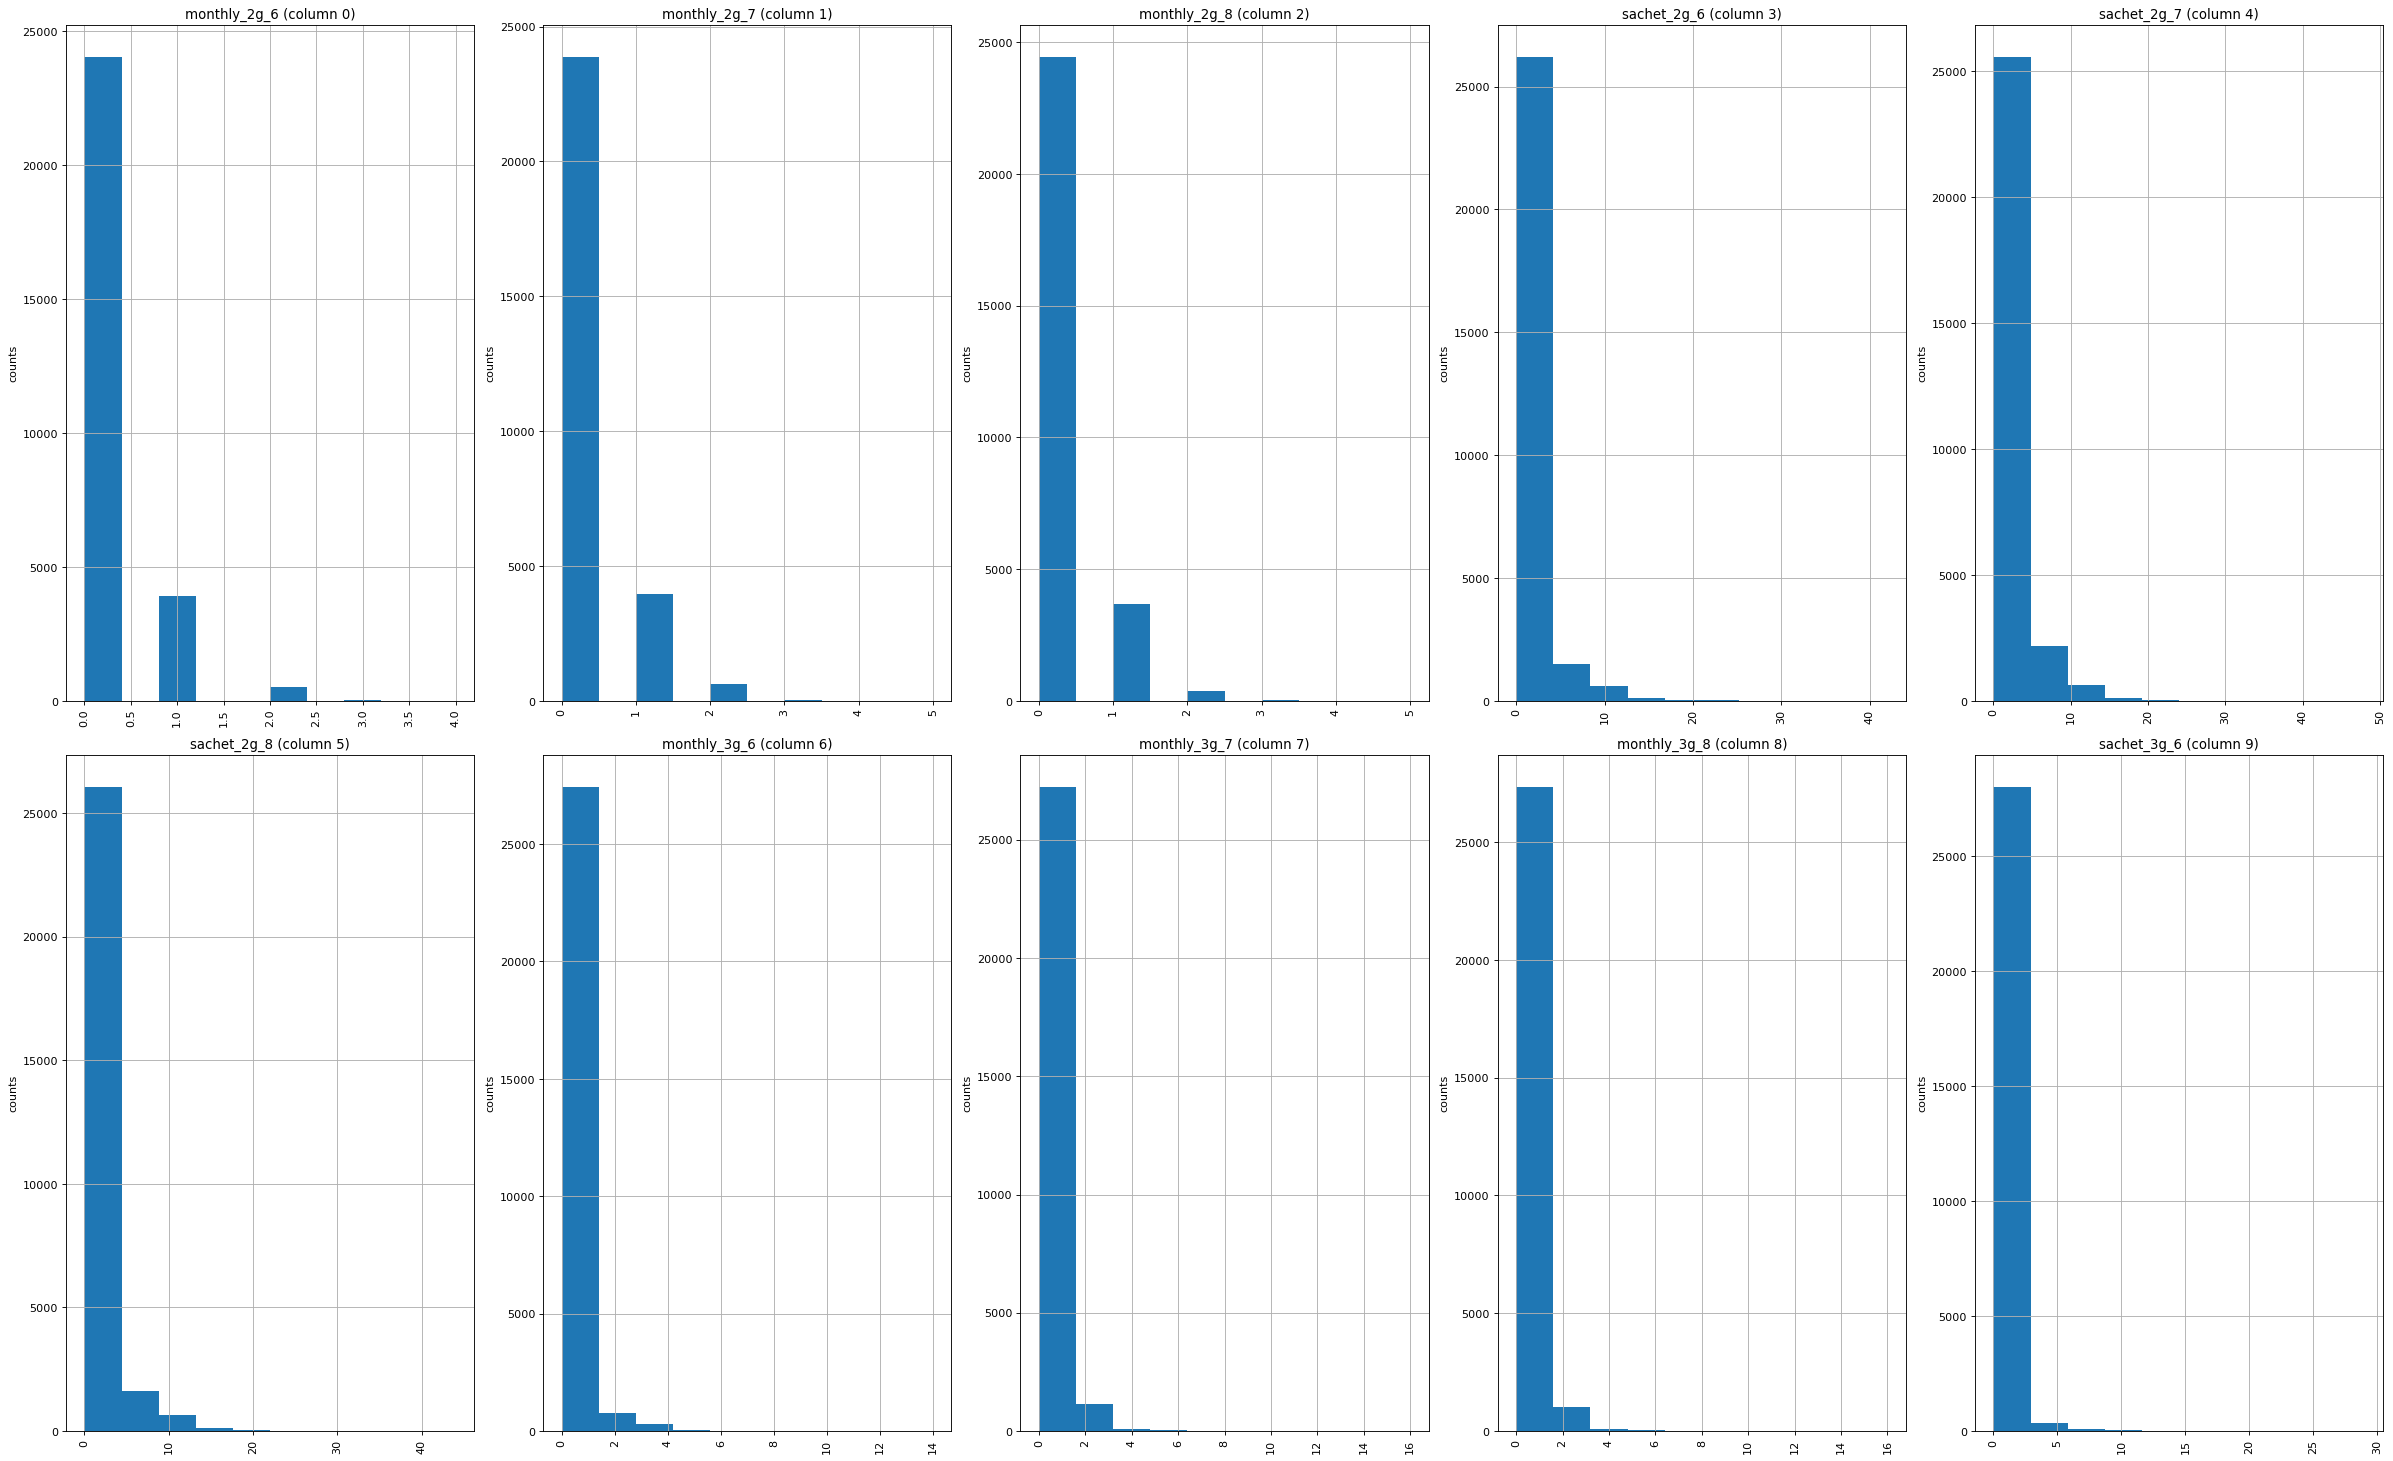

In [24]:
plotPerColumnDistribution(churn_hv_cust, 10, 5)

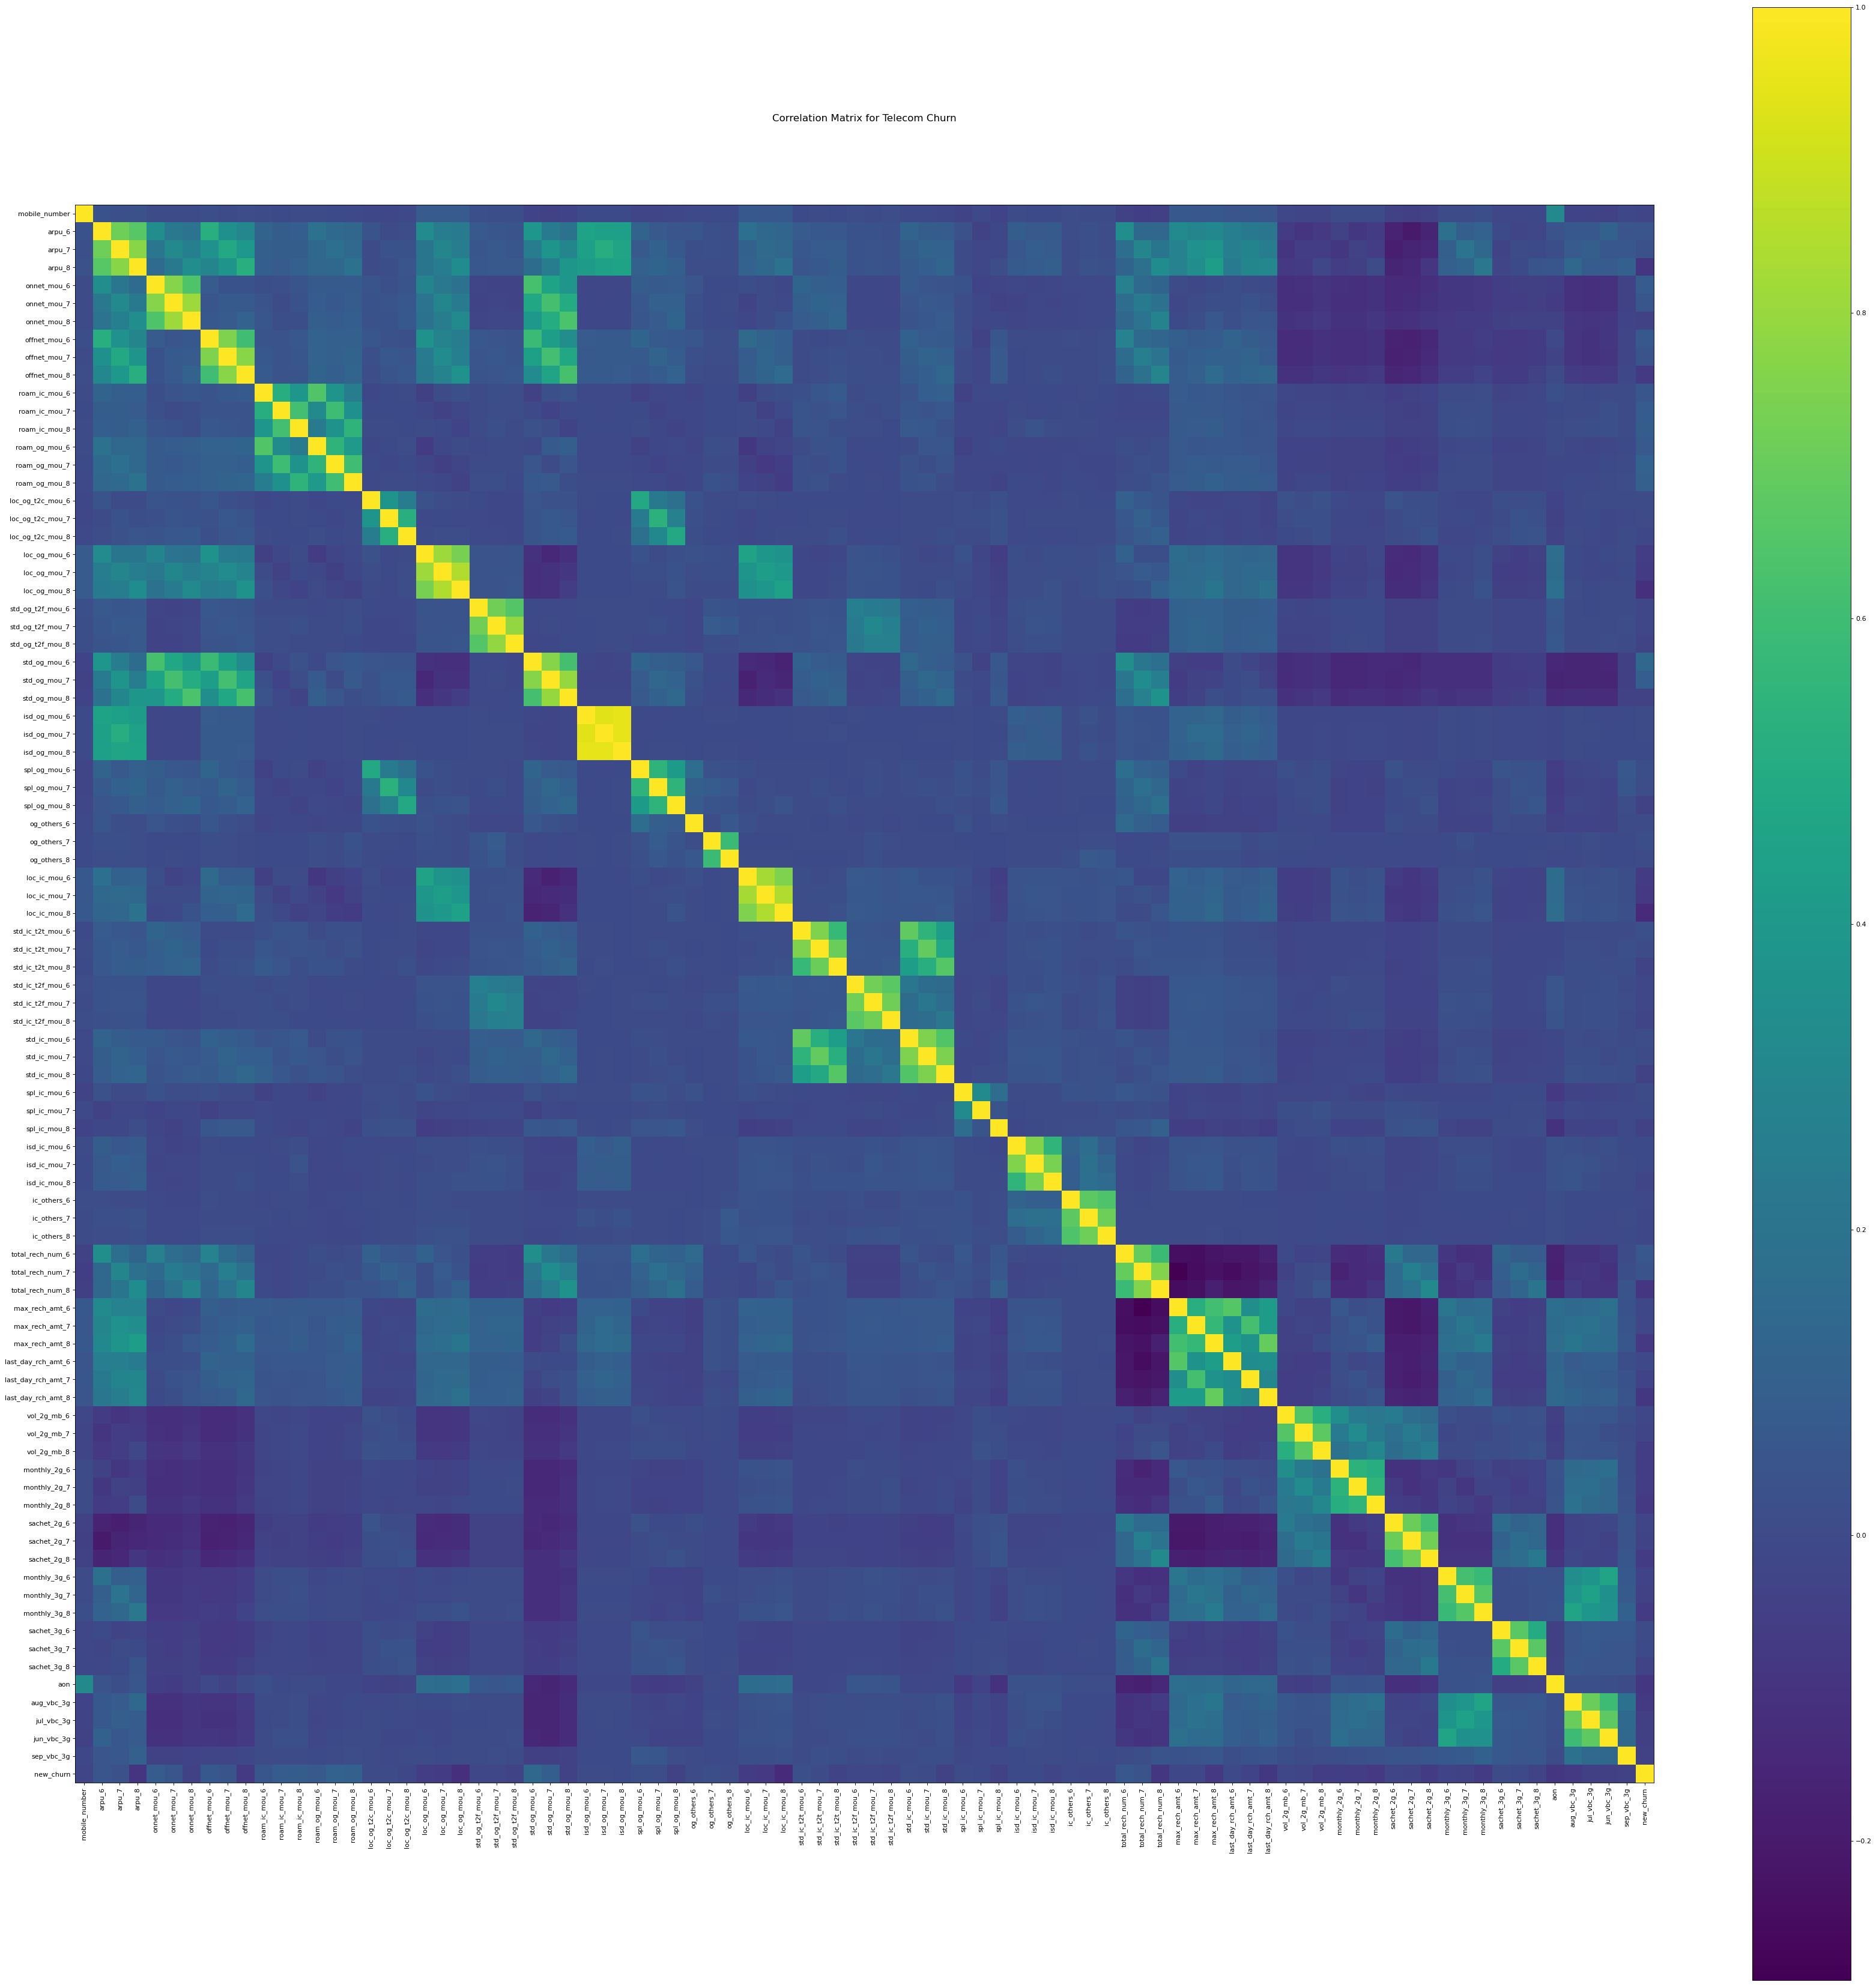

In [25]:
plotCorrelationMatrix(churn_hv_cust, 53)

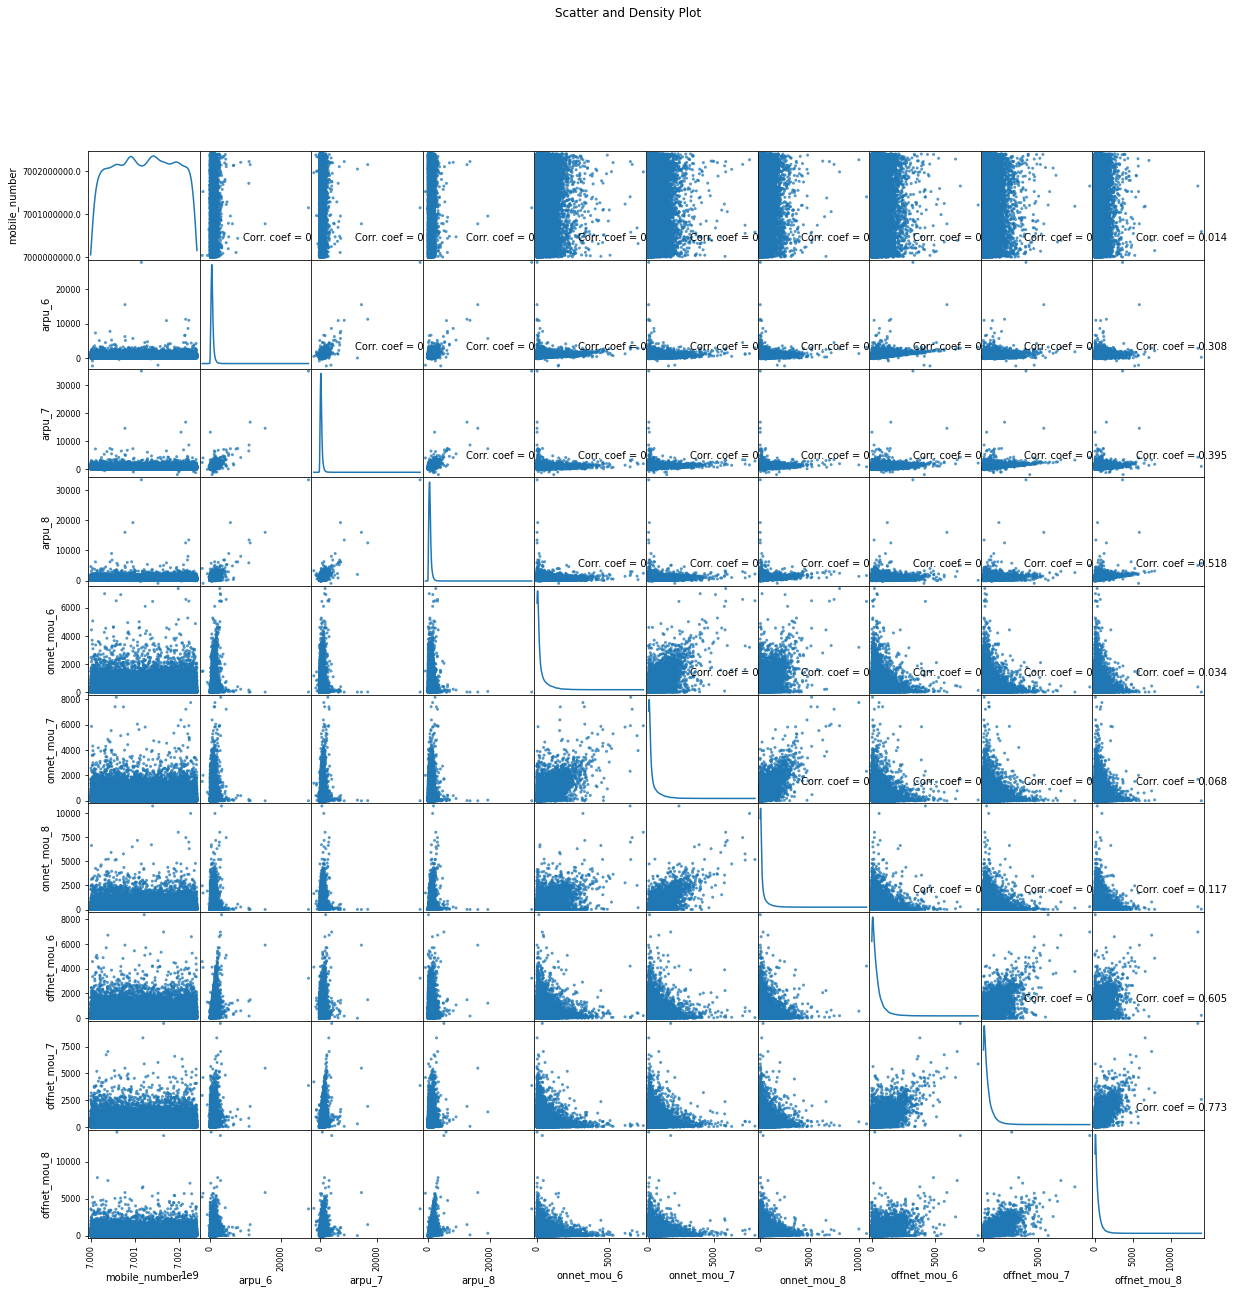

In [26]:
plotScatterMatrix(churn_hv_cust, 20, 10)

In [27]:
# Perform new features from existing
# Create list of columns belonging to 6th and 7th months

col_list = churn_hv_cust.filter(regex='_6|_7').columns.str[:-2]
col_list.unique()

print (churn_hv_cust.shape)

(28504, 88)


In [28]:
# lets take the average now
for idx, col in enumerate(col_list.unique()):
    avg_col_name = "avg_"+col+"_av67"
    col_6 = col+"_6"
    col_7 = col+"_7"
    churn_hv_cust[avg_col_name] = (churn_hv_cust[col_6]  + churn_hv_cust[col_7])/ 2

In [29]:
# Drop columns and create new dervied from new feature 

col_to_drop = churn_hv_cust.filter(regex='_6|_7').columns
churn_hv_cust.drop(col_to_drop, axis=1, inplace=True)

churn_hv_cust.shape

(28504, 61)

In [30]:
# Conevrt AON in months

churn_hv_cust['aon_mon'] = churn_hv_cust['aon']/30
churn_hv_cust.drop('aon', axis=1, inplace=True)
churn_hv_cust['aon_mon'].head()

7     26.733333
8     10.500000
21    24.000000
23    20.133333
33    44.266667
Name: aon_mon, dtype: float64

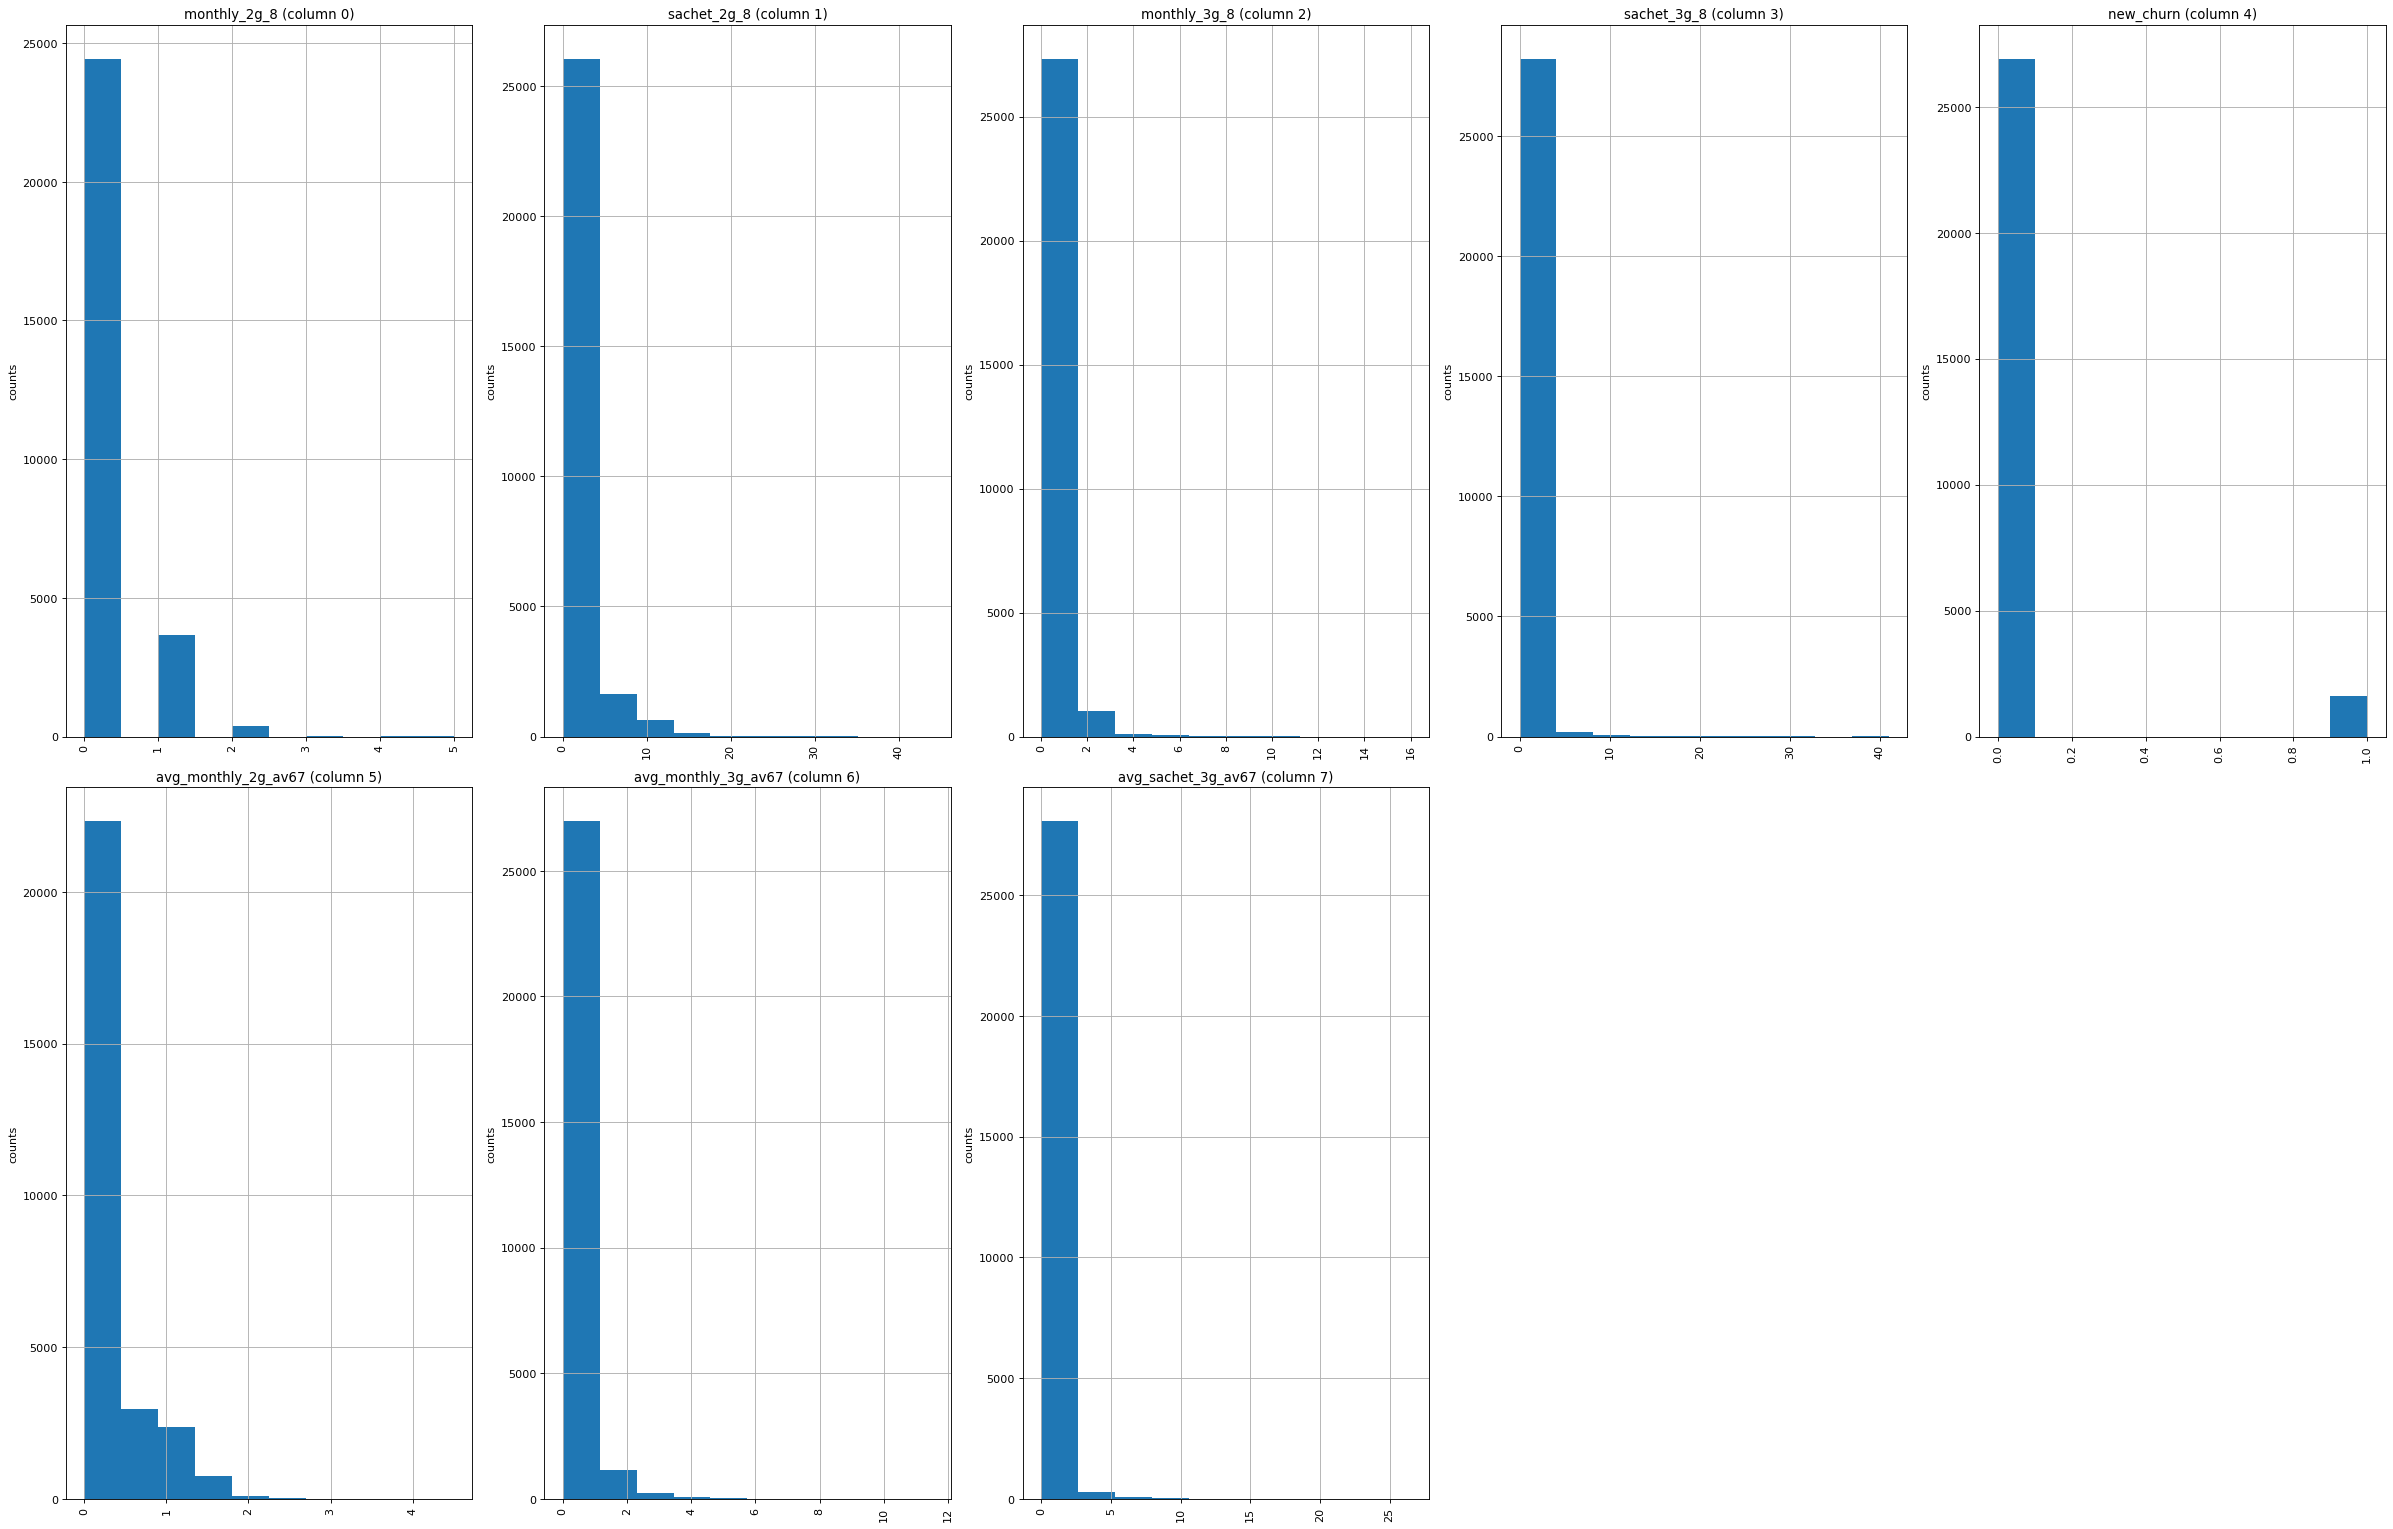

In [31]:
# Plots with the updated dataset

plotPerColumnDistribution(churn_hv_cust, 10, 5)

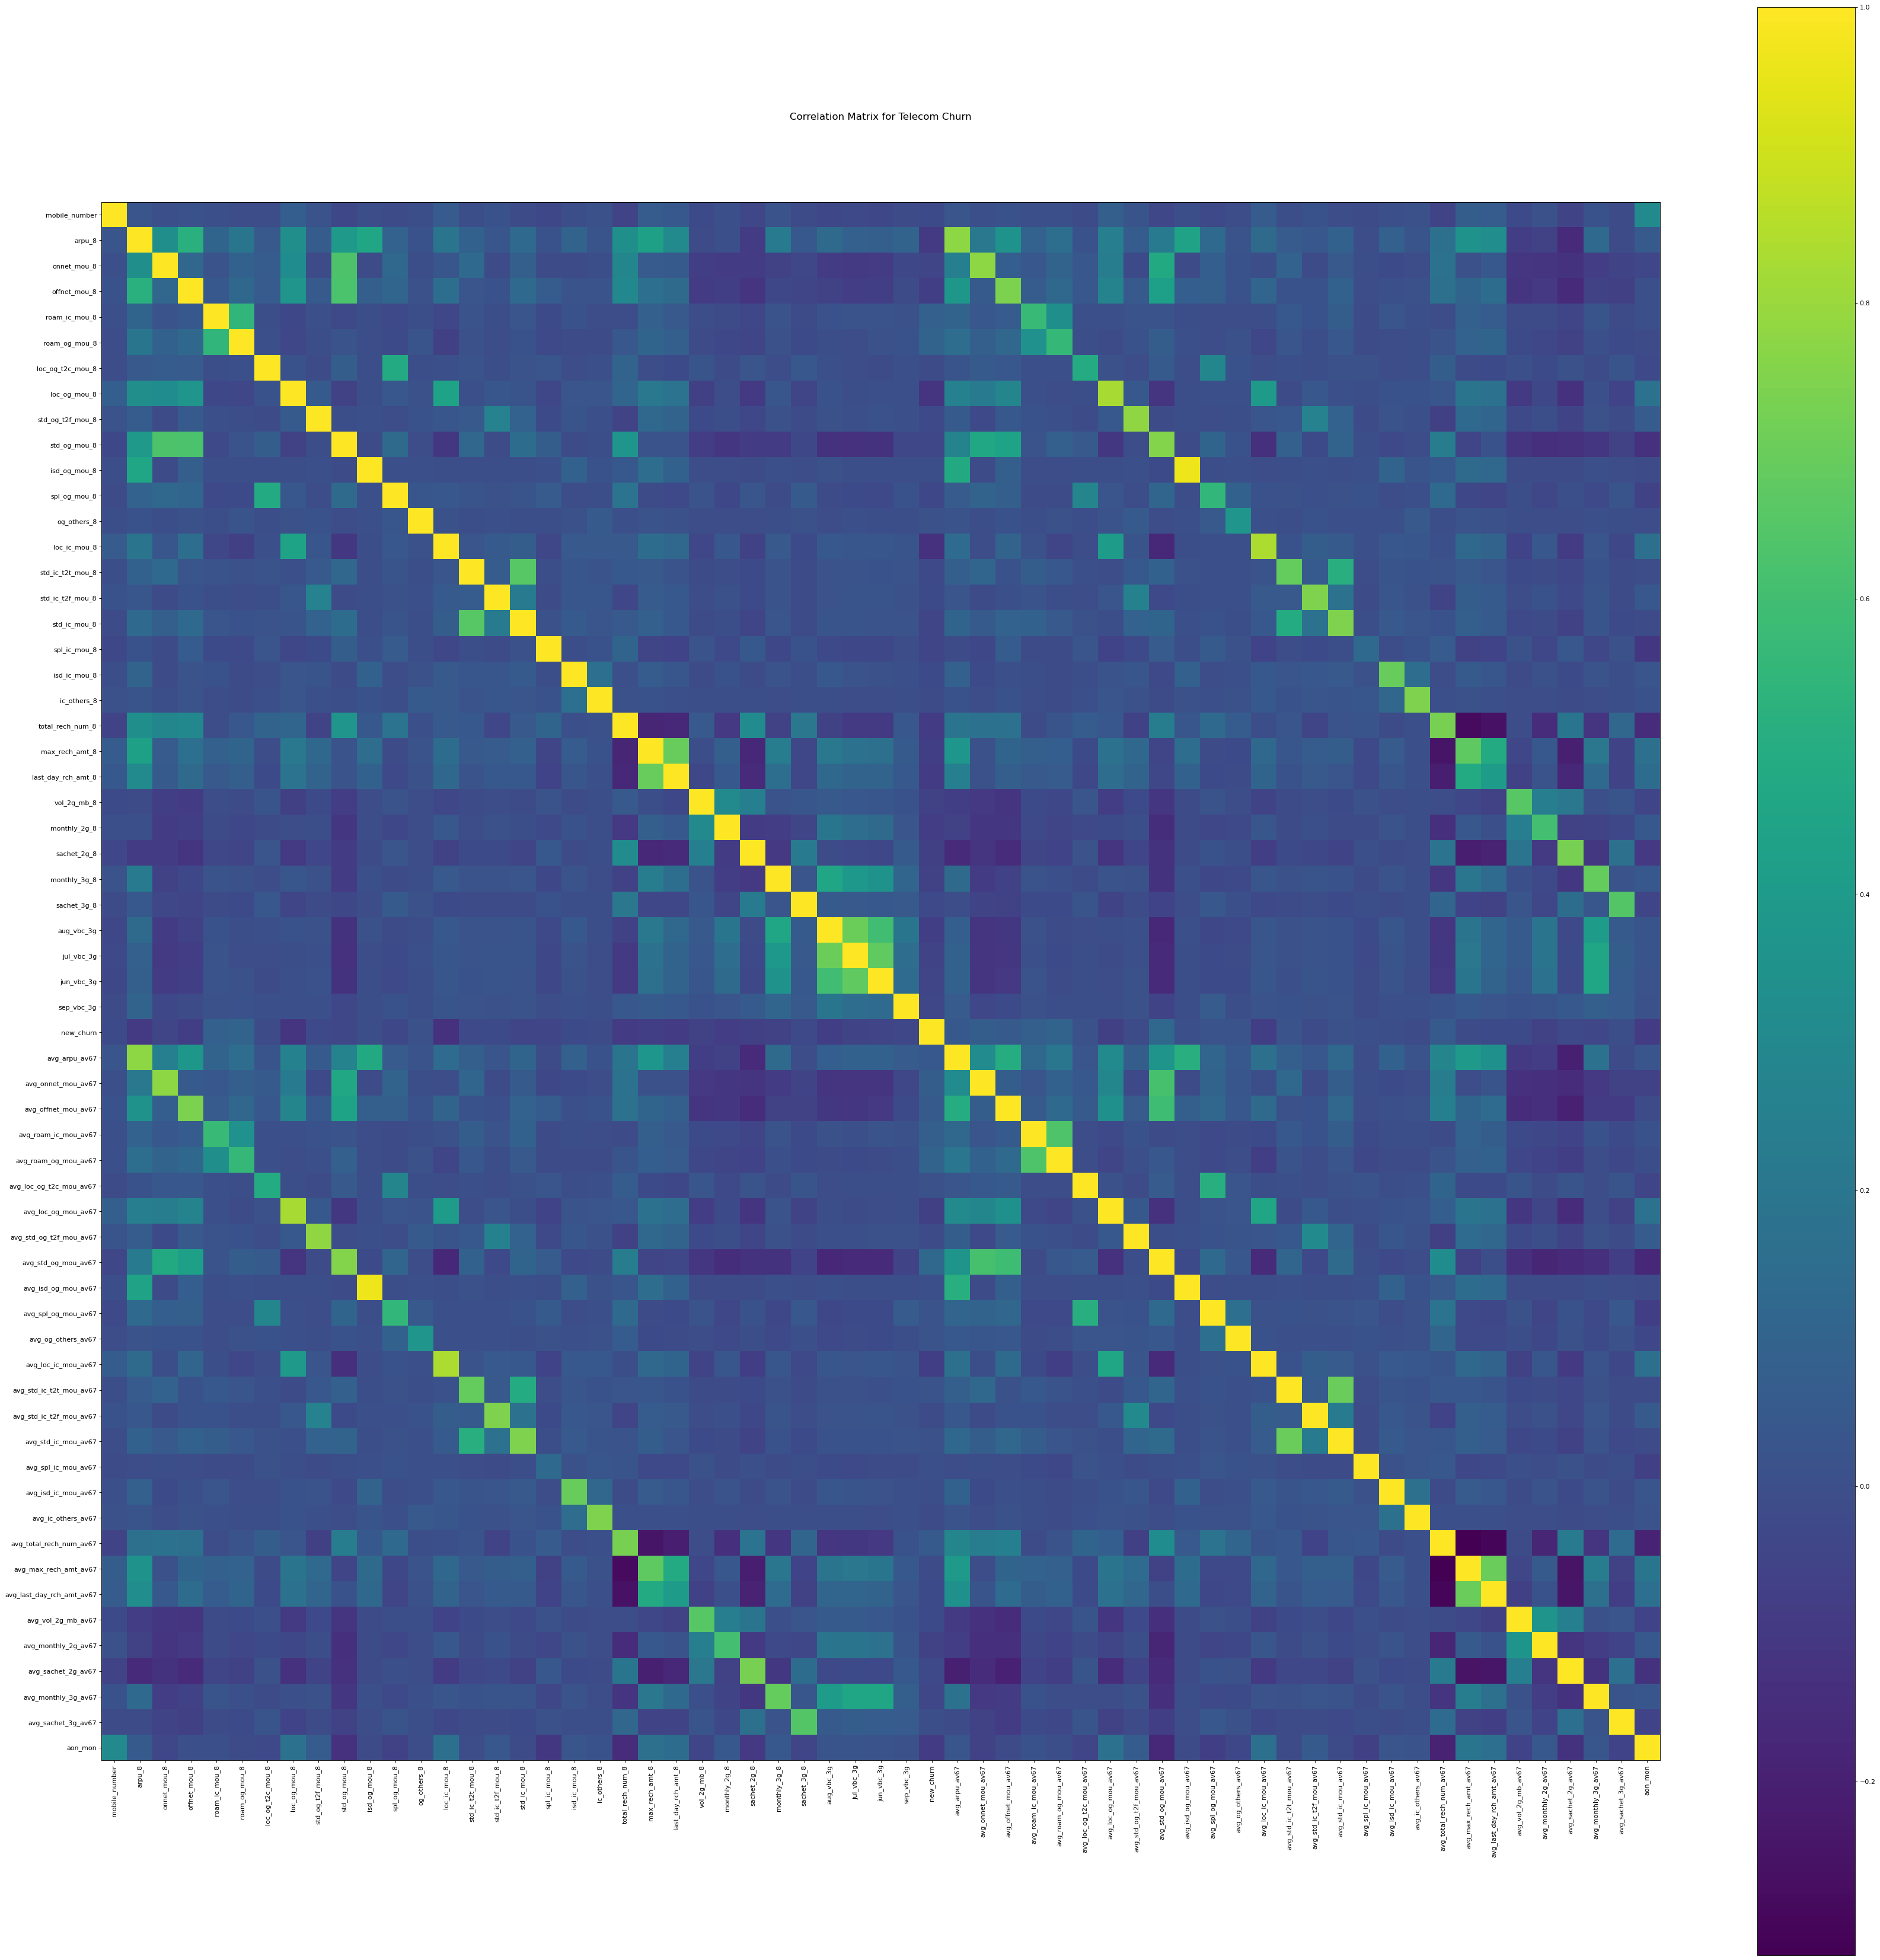

In [32]:
plotCorrelationMatrix(churn_hv_cust, 53)

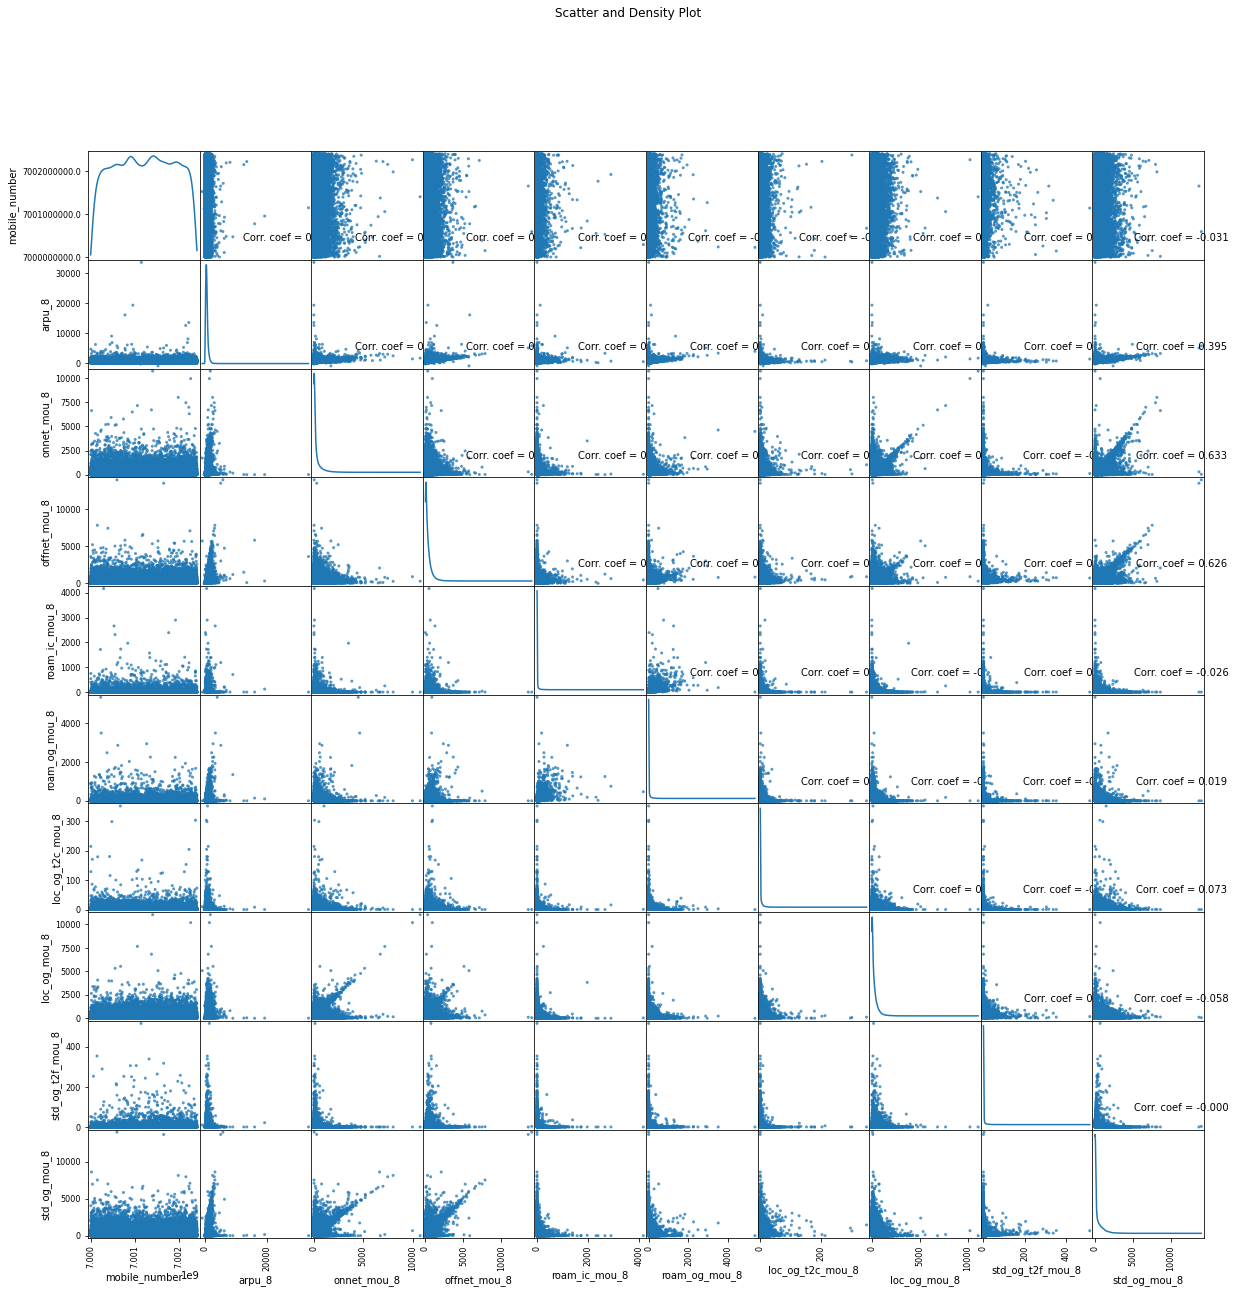

In [33]:
plotScatterMatrix(churn_hv_cust, 20, 10)

Text(0.5, 1.0, 'Tenure Graph')

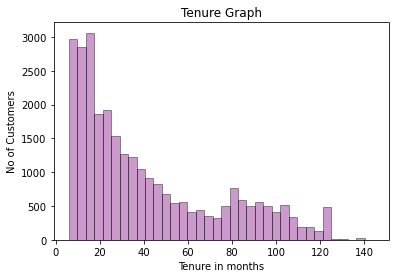

In [34]:
ax = sns.distplot(churn_hv_cust['aon_mon'], hist=True, kde=False, 
             bins=int(180/5), color = 'purple', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 10})
ax.set_ylabel('No of Customers')
ax.set_xlabel('Tenure in months')
ax.set_title('Tenure Graph')

In [35]:
tn_range = [0, 6, 12, 24, 60, 61]
tn_label = [ '0-6 Months', '6-12 Months', '1-2 Yrs', '2-5 Yrs', '5 Yrs and above']
churn_hv_cust['tenure_range'] = pd.cut(churn_hv_cust['aon_mon'], tn_range, labels=tn_label)
churn_hv_cust['tenure_range'].head()

7         2-5 Yrs
8     6-12 Months
21        1-2 Yrs
23        1-2 Yrs
33        2-5 Yrs
Name: tenure_range, dtype: category
Categories (5, object): [0-6 Months < 6-12 Months < 1-2 Yrs < 2-5 Yrs < 5 Yrs and above]

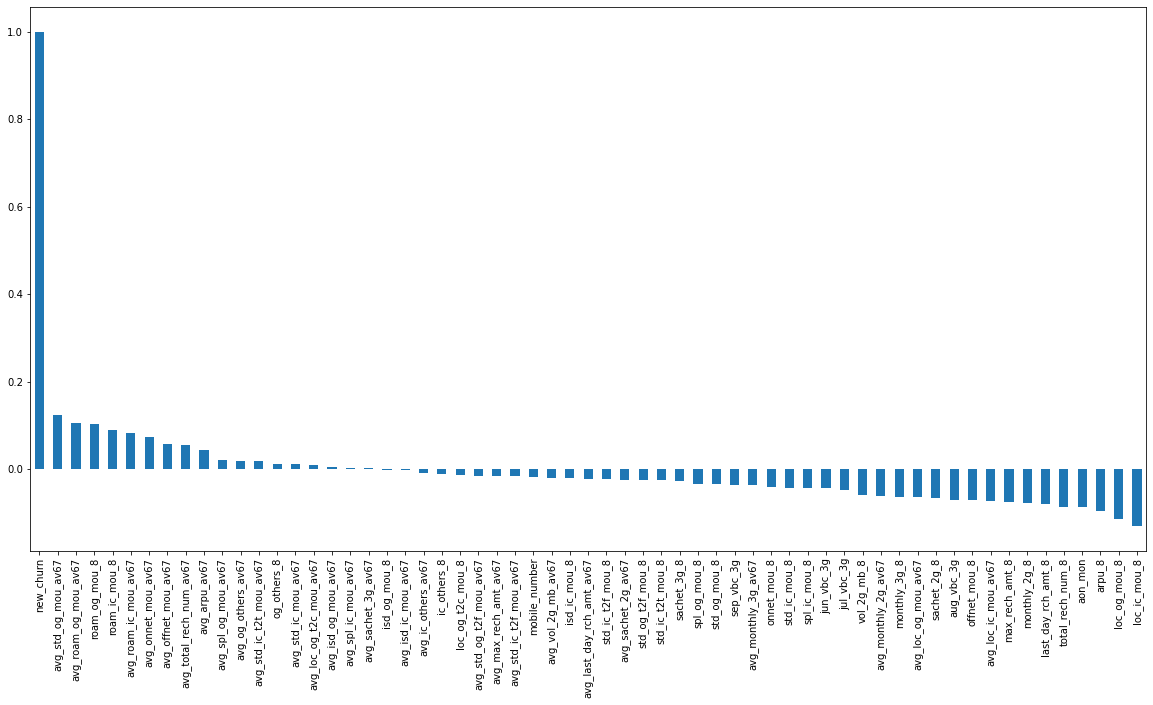

In [36]:
# =Check correlation of churn with other columns

plt.figure(figsize=(20,10))
churn_hv_cust.corr()['new_churn'].sort_values(ascending = False).plot(kind='bar')


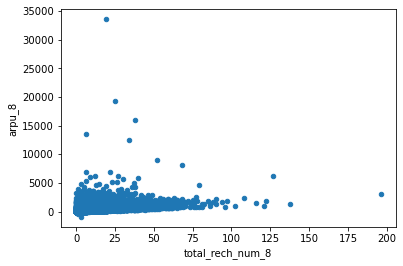

In [37]:
# lets now draw a scatter plot between total recharge and avg revenue for the 8th month
churn_hv_cust[['total_rech_num_8', 'arpu_8']].plot.scatter(x = 'total_rech_num_8', y='arpu_8')

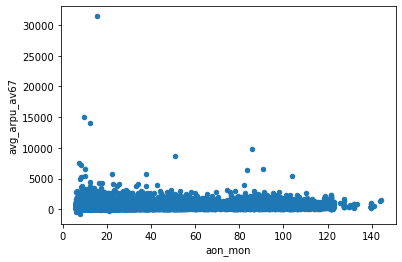

In [38]:
# plot between tenure and revenue
churn_hv_cust[['aon_mon', 'avg_arpu_av67']].plot.scatter(x = 'aon_mon', y='avg_arpu_av67')

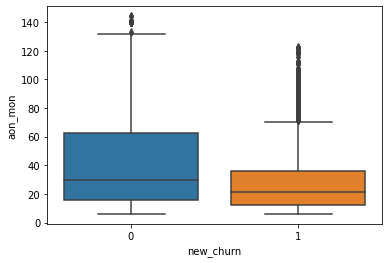

In [39]:
# Churn Vs Other Feature
sns.boxplot(x = churn_hv_cust.new_churn, y = churn_hv_cust.aon_mon)

Text(0.5, 1.0, 'Churn Vs Base Cost')

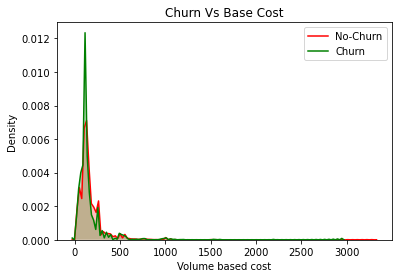

In [40]:
# Churn Vs Base Cost

ax = sns.kdeplot(churn_hv_cust.avg_max_rech_amt_av67[(churn_hv_cust["new_churn"] == 0)], color="Red", shade = True)
ax = sns.kdeplot(churn_hv_cust.avg_max_rech_amt_av67[(churn_hv_cust["new_churn"] == 1)], ax =ax, color="Green", shade= True)
ax.legend(["No-Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Volume based cost')
ax.set_title('Churn Vs Base Cost')

Text(0.5, 1.0, 'Distribution of Max Recharge Amount by churn')

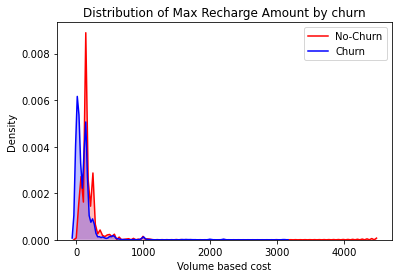

In [41]:
# Churn vs max rechare amount

ax = sns.kdeplot(churn_hv_cust.max_rech_amt_8[(churn_hv_cust["new_churn"] == 0)],color="Red", shade = True)
ax = sns.kdeplot(churn_hv_cust.max_rech_amt_8[(churn_hv_cust["new_churn"] == 1)], ax =ax, color="Blue", shade= True)
ax.legend(["No-Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Volume based cost')
ax.set_title('Distribution of Max Recharge Amount by churn')

## Model Building

In [42]:
# Create a new dataset for model building
df = churn_hv_cust[:].copy()

# Drop tenure range because it is highly correlated with AON MONTH column
df.drop('tenure_range', axis=1, inplace=True)
df.drop('mobile_number', axis=1, inplace=True)
df.head()

,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2f_mou_8,std_og_mou_8,isd_og_mou_8,...,avg_ic_others_av67,avg_total_rech_num_av67,avg_max_rech_amt_av67,avg_last_day_rch_amt_av67,avg_vol_2g_mb_av67,avg_monthly_2g_av67,avg_sachet_2g_av67,avg_monthly_3g_av67,avg_sachet_3g_av67,aon_mon
7,3171.480,52.29,325.91,31.64,38.06,0.00,255.79,16.68,77.84,10.01,...,15.465,5.0,1185.0,0.0,0.000,0.0,0.0,0.0,0.0,26.733333
8,137.362,35.08,136.48,0.00,0.00,7.15,63.04,0.00,98.28,0.00,...,0.000,20.0,122.0,25.0,178.000,0.5,0.5,0.0,0.0,10.500000
21,637.760,85.14,983.39,0.00,0.00,0.00,129.74,0.00,938.79,0.00,...,0.000,24.0,50.0,25.0,0.000,0.0,0.0,0.0,0.0,24.000000
23,366.966,33.58,205.89,0.00,0.00,17.71,182.14,0.00,39.61,0.00,...,2.675,4.0,89.5,89.5,0.240,0.0,0.0,1.0,0.0,20.133333
33,409.230,0.00,0.00,0.00,0.00,0.56,0.00,0.00,0.00,0.00,...,0.940,10.5,753.5,126.0,72.405,0.0,0.0,4.5,2.0,44.266667


In [43]:
# Create X & y dataset for model building
X = df.drop(['new_churn'], axis=1)
y = df['new_churn']

df.drop('new_churn', axis=1, inplace=True)

In [44]:
# Apply scaling on the dataset
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

scaler = preprocessing.StandardScaler().fit(X)
X = scaler.transform(X)

In [45]:
# Split the dateset into train and test datasets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7, random_state=1)
print(X_train.shape)
print(X_test.shape)

(19952, 59)
(8552, 59)


In [46]:
# Import libraries for balancing dataset
from imblearn.over_sampling import SMOTE

sm = SMOTE(kind = "regular")
X_tr,y_tr = sm.fit_sample(X_train,y_train)

ModuleNotFoundError: No module named 'imblearn'

In [ ]:
print(X_tr.shape)
print(y_tr.shape)

print((y_tr != 0).sum()/(y_tr == 0).sum())

In [ ]:
# SVM
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)

lr = LogisticRegression()

lr.svm = SVC(kernel='linear') 
lr.svm.fit(X_train,y_train)
preds = lr.svm.predict(X_test)
metrics.accuracy_score(y_test, preds)

Observation - linear SVM gave us accuracy of 94% on test data

In [ ]:
#RFE
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
from sklearn.feature_selection import RFE

rfe = RFE(lr, 15)   
rfe = rfe.fit(X_tr, y_tr)

In [ ]:
rfe_features = list(df.columns[rfe.support_])
print(rfe_features)

In [ ]:
X_rfe = pd.DataFrame(data=X_tr).iloc[:, rfe.support_]
y_rfe = y_tr

In [ ]:
#Logisctic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=1)
lr.fit(X_rfe, y_rfe)

In [ ]:
X_test_rfe = pd.DataFrame(data=X_test).iloc[:, rfe.support_]

y_pred = lr.predict(X_test_rfe)

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
print(lr.score(X_test_rfe, y_test))

In [ ]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

Conclusion from the above model:
Model Accuracy is approx 79% Confusion matix shows high false positive rate, which is not good, lets try PCA now.

In [ ]:
# PCA
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7, random_state=1)

from imblearn.over_sampling import SMOTE
sm = SMOTE(kind = "regular")
X_tr,y_tr = sm.fit_sample(X_train,y_train)
print(X_tr.shape)
print(y_tr.shape)

In [ ]:
# import PCA
from sklearn.decomposition import PCA
pca = PCA(random_state=100)

# Apply PCA on train data
pca.fit(X_tr)

In [ ]:
X_tr_pca = pca.fit_transform(X_tr)
print(X_tr_pca.shape)

X_test_pca = pca.transform(X_test)
print(X_test_pca.shape)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
lr_pca = LogisticRegression(C=1e9)
lr_pca.fit(X_tr_pca, y_tr)

# Predictions
y_pred = lr_pca.predict(X_test_pca)

# convert prediction array into a dataframe
y_pred_df = pd.DataFrame(y_pred)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Confusion matrix
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

In [ ]:
col = list(df.columns)
df_pca = pd.DataFrame({'PC-1':pca.components_[0],'PC-2':pca.components_[1], 'PC-3':pca.components_[2],'Feature':col})
df_pca.head(10)

In [ ]:
# scree plot to check the variance explained by different PCAs
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('no of principal components')
plt.ylabel('explained variance - cumulative')
plt.show()

In [ ]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
# 33 columns explains 90% of the variance, lets apply PCA with 33 components

In [ ]:
# PCA with 33 components
pca_33 = PCA(n_components=33)

df_tr_pca_33 = pca_33.fit_transform(X_tr)
print(df_tr_pca_33.shape)

df_test_pca_33 = pca_33.transform(X_test)
print(df_test_pca_33.shape)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
lr_pca1 = LogisticRegression(C=1e9)
lr_pca1.fit(df_tr_pca_33, y_tr)

# Predicted probabilities
y_pred33 = lr_pca1.predict(df_test_pca_33)

# Converting y_pred to a dataframe which is an array
df_y_pred = pd.DataFrame(y_pred33)

print("Accuracy with 33 PCAs: ",accuracy_score(y_test,y_pred33))

In [ ]:
print(confusion_matrix(y_test,y_pred33))

Conclusions from the above model:

Model has 80% Accuracy 33 features can explain 90% variance in the dataset most imp features: arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8

In [ ]:
# Decision Tree

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7, random_state=1)

# apply SMOTE to tackle class imbalance
from imblearn.over_sampling import SMOTE
sm = SMOTE(kind = "regular")
X_tr,y_tr = sm.fit_sample(X_train,y_train)
print(X_tr.shape)
print(y_tr.shape)

In [ ]:
# feature selection using lasso
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
 
svc = LinearSVC(C=0.001, penalty="l1", dual=False).fit(X_tr, y_tr)
svc_model = SelectFromModel(svc, prefit=True)
X_lasso = svc_model.transform(X_tr)
position = svc_model.get_support(indices=True)

print(X_lasso.shape)
print(position)

In [ ]:
# Decision tree
lasso_features = list(df.columns[position])
print("Lasso Features: ", lasso_features)

In [ ]:
# import decision tree libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# lets create a decision tree with the default hyper parameters except max depth to make the tree readable
dt1 = DecisionTreeClassifier(max_depth=5)
dt1.fit(X_lasso, y_tr)

In [ ]:
# lets see the classification reort of the model built
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Model predictions
X_test = pd.DataFrame(data=X_test).iloc[:, position]
y_pred1 = dt1.predict(X_test)

# classification report
print(classification_report(y_test, y_pred1))

In [ ]:
# confusion matrix
print(confusion_matrix(y_test,y_pred1))
# accuracy of the decision tree
print('Decision Tree - Accuracy :',accuracy_score(y_test,y_pred1))

In [ ]:
# GridSearchCV to find optimal max_depth
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(1, 40)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)
                               
# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",
                   return_train_score=True)
tree.fit(X_lasso, y_tr)

In [ ]:
# grid search results
score = tree.cv_results_
pd.DataFrame(score).head()

In [ ]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(score["param_max_depth"], 
         score["mean_train_score"], 
         label="training accuracy")
plt.plot(score["param_max_depth"], 
         score["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
# lets find optimal value of minimum sample leaf
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(5, 200, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",
                   return_train_score=True)
tree.fit(X_lasso, y_tr)

In [ ]:
# grid search results
score = tree.cv_results_
pd.DataFrame(score).head()

In [ ]:
# plotting accuracies with min_sample_leaf
plt.figure()
plt.plot(score["param_min_samples_leaf"], 
         score["mean_train_score"], 
         label="training accuracy")
plt.plot(score["param_min_samples_leaf"], 
         score["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_sample_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
# lets fine tune min sample split now
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(5, 200, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",
                   return_train_score=True)
tree.fit(X_lasso, y_tr)

In [ ]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

In [ ]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [ ]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(25, 175, 50),
    'min_samples_split': range(50, 150, 50),
    'criterion': ["entropy", "gini"]
}

n_folds = 5

# Instantiate the grid search model
dtree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, 
                          cv = n_folds, verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_lasso, y_tr)

In [ ]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results
# printing the optimal accuracy score and hyperparameters
print("Best Accuracy", grid_search.best_score_)

In [ ]:
print(grid_search.best_estimator_)

In [ ]:
# model with optimal hyperparameters
clf_gini = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=5, 
                                  min_samples_leaf=25,
                                  min_samples_split=50)
clf_gini.fit(X_lasso, y_tr)

In [ ]:
# accuracy score
print ('Accuracy Score for Decision Tree Final Model :',clf_gini.score(X_test,y_test))

 Conclusion from the above Decision Tree model
1. 85% accuracy on the test dataset
2. lots of false positives in the confusion matrix

In [ ]:
# Random Forest

from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

model_rf = RandomForestClassifier()
model_rf.fit(X_lasso, y_tr)

# Make predictions
prediction_test = model_rf.predict(X_test)
print ('Randon Forest Accuracy with Default Hyperparameter',metrics.accuracy_score(y_test, prediction_test))

In [ ]:
print(classification_report(y_test,prediction_test))

In [ ]:
# Printing confusion matrix
print(confusion_matrix(y_test, prediction_test))

In [ ]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(2, 20, 5)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",
                  return_train_score=True)
rf.fit(X_lasso, y_tr)

In [ ]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

In [ ]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
# K-fold

n_folds = 5

parameters = {'n_estimators': range(100, 1500, 400)}
#
## instantiate the model (note we are specifying a max_depth)
rf = RandomForestClassifier(max_depth=4)
#
#
## fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",
                  return_train_score=True)
rf.fit(X_lasso, y_tr)

In [ ]:
## scores of GridSearch CV
scores = rf.cv_results_
#
## plotting accuracies with n_estimators
plt.figure()
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
# GridSearchCV to find optimal min_samples_leaf
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(50, 400, 10)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",
                  return_train_score=True)
rf.fit(X_lasso, y_tr)

In [ ]:
# scores of GridSearch CV
scores = rf.cv_results_

# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
# GridSearchCV to find optimal min_samples_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(100, 500, 25)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",
                   return_train_score=True)
rf.fit(X_lasso, y_tr)

In [ ]:
# scores of GridSearch CV
scores = rf.cv_results_

# plotting accuracies with min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [4,8,10],
    'min_samples_leaf': range(100, 300, 100),
    'min_samples_split': range(200, 500, 100),
    'n_estimators': [500,700], 
    'max_features': [10,20,25]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1)

In [ ]:
# fit the grid search with the data
grid_search.fit(X_lasso, y_tr)
# optimal accuracy score and hyperparameters
print('Accuracy is',grid_search.best_score_,'using',grid_search.best_params_)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

model_rf = RandomForestClassifier(bootstrap=True,
                                  max_depth=10,
                                  min_samples_leaf=100, 
                                  min_samples_split=200,
                                  n_estimators=1000 ,
                                  oob_score = True, n_jobs = -1,
                                  random_state =50,
                                  max_features = 15,
                                  max_leaf_nodes = 30)
model_rf.fit(X_train, y_train)

# Make predictions
prediction_test = model_rf.predict(X_test)

In [ ]:
# evaluation metrics
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,prediction_test))
print(confusion_matrix(y_test,prediction_test))

In [ ]:
# accuracy score
print ('Accuracy Score for Random Forest Final Model :',metrics.accuracy_score(y_test, prediction_test))

In [ ]:
# list of important features
X = df
features = X.columns.values
X = pd.DataFrame(scaler.transform(X))
X.columns = features

importances = model_rf.feature_importances_
weights = pd.Series(importances,
                 index=X.columns.values)
weights.sort_values()[-10:].plot(kind = 'barh')

Conclusions from Random Forest
Local Incoming for Month 8, Average Revenue Per Customer for Month 8 and Max Recharge Amount for Month 8 are the most important predictor variables to predict churn.

### Overall Conclusions
1. Std Outgoing Calls and Revenue Per Customer are strong indicators of Churn.
2. Local Incoming and Outgoing Calls for 8th Month and avg revenue in 8th Month are the most important columns to predict churn.
3. cutomers with tenure less than 4 yrs are more likely to churn.
4. Max Recharge Amount is a strong feature to predict churn.
5. Random Forest produced the best prediction results followed by SVM.